# Lab 5A - Vector Calculus

**Vector calculus** basically constitutes a particular collection of results that are crucial for studying vector fields. Recall that a **vector field** on $\mathbb{R}^n$ is a continuous assignment of a vector to each point in $\mathbb{R}^n$. Accordingly, you can think of a vector field as simply a function from $\mathbb{R}^n \to \mathbb{R}^n$ -- it takes in a point in $\mathbb{R}^n$ and spits out a vector in $\mathbb{R}^n$ (This is slightly confusing, since the input $\mathbb{R}^n$ represents geometric _points_ in $n$-dimensional space, but the output $\mathbb{R}^n$ represents $n$-dimensional _vector_ quantities.).

We care about vector fields because they effectively model a variety of quantities of physical interest. For example, in physics, we are interested in computing the motion of a particle placed in a _force field_, which is a vector field whose output at a point $p$ is the force that is on the particle when the particle is at $p$. Another example is a _velocity field_, which can be used to describe the flow of a liquid: the field assigns to each point $p$ the velocity of the bit of fluid that is at $p$. 

In this lab, we'll focus entirely on two-dimensional vector fields, i.e. maps $\mathbf{F} : \mathbb{R}^2 \to \mathbb{R}^2$.

## Line Integrals

One useful operation we can perform on a vector field is _integration of the vector field along a curve_, a.k.a. the **line integral**. In the context where $\mathbf{F}$ is a force field, the line integral along a curve $\gamma$ represents the _work_ done by the field on a particle whose trajectory is described by $\gamma$. Recall that the work done by a force is the magnitude of the force, multiplied by the distance through which the force acts. (So, as a very simple refresher example, when you lift a ball of mass $m$ to a height of $h$, the force you apply must balance the force exerted by gravity, which points downwards and has magnitude $mg$; thus, you must do $mgh$ joules of work to lift the ball.)

Suppose a particle is restricted in trajectory to the parametric curve $\gamma: [a,b] \to \mathbb{R}^2$, where $a$ and $b$ are two moments in time. We want to calculate the work done on the particle by the force field $\mathbf{F}$ during the time interval $[a,b]$. At time $t$, the particle is at $\gamma(t)$ and experiences an approximately constant force given by $\mathbf{F}(\gamma(t))$. 


<img src="Lab 5A Images/line_int.png" style="width: 650px;"/>


During the time interval $[t, t+dt]$, the displacement of the particle is given by the vector $\gamma'(t) dt$. Since the particle is restrained to the trajectory $\gamma$, the component of force perpendicular to $\gamma'(t) dt$ has no effect on the particle: only the component parallel to $\gamma'(t) dt$ matters. This component has magnitude 

$$\mathbf{F}(\gamma(t)) \cdot \frac{\gamma'(t)dt}{\|\gamma'(t) dt\|} $$(recall the formula for projection of one vector onto another). The distance through which the force acts is $\|\gamma'(t) dt\|$. Therefore, the work done by $\mathbf{F}$ during $[t,t+dt]$ is simply $\mathbf{F}(\gamma(t)) \cdot \gamma'(t) \, dt$. Summing this over all the time intervals in $[a,b]$, we see that the total work is 

$$W = \int_{a}^{b} \mathbf{F}(\gamma(t)) \cdot \gamma'(t) \, dt$$

In more general contexts that don't interpret this quantity as work, it is called the line integral of $\mathbf{F}$ over the curve $\gamma$. The infinitesimal vector displacement $\gamma'(t) \, dt$ is often written as $d\mathbf{r}$, so we can also write 

$$W = \int_{\gamma} \mathbf{F} \cdot d\mathbf{r}$$ Yet another way to write this integral is to "expand" the dot product: the infinitesimal displacement $d\mathbf{r}$ is $(dx, dy)$, and if we write $\mathbf{F} = (P, Q)$ (i.e. for a point $p$ in $\mathbb{R}^2$, $P(p)$ gives the $x$-component of the vector $\mathbf{F}(p)$ and $Q(p)$ gives the $y$-component of $\mathbf{F}(p)$), then we can also write the line integral as $$\int_{\gamma} P \, dx + Q \, dy$$

### Example Line Integral Computation

Consider a particle with trajectory $\gamma(t) = (\cos(t), \sin(t))$ in the force field $$\mathbf{F}(x,y) = (x-y^2, x+y)$$ What is the net work done on the particle by $\mathbf{F}$ during the time interval $[0, 2\pi]$?

We can visualize this vector field using MATLAB's `quiver` function. This function takes as inputs a pair of matrices describing the $x$- and $y$-coordinates of the points at which you'd like to see the vector field, and a pair of matrices describing the $x$- and $y$-components of the vectors associated to these points. Based on the plot, do we expect that $\mathbf{F}$ does positive or negative work on the particle?

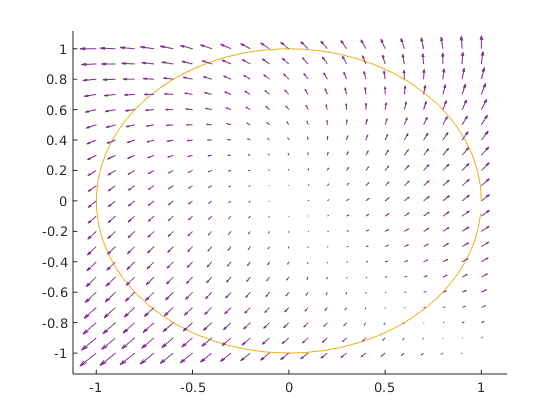

In [11]:
%plot inline
t = 0:.1:2*pi;
gammax = cos(t);
gammay = sin(t);
hold on
plot(gammax, gammay)

[xmat,ymat] = meshgrid(-1:.1:1, -1:.1:1);
quiver( xmat, ymat, xmat-ymat.^2, xmat +ymat)

We compute $\mathbf{F}(\gamma(t)) = (\cos(t) - \sin^2 (t), \cos(t) + \sin(t))$ and $\gamma'(t) = (-\sin(t), \cos(t))$, so 

$$ \int_{0}^{2\pi} \mathbf{F}(\gamma(t)) \cdot \gamma'(t) \, dt = \int_{0}^{2 \pi} \left[ -\sin(t) \cos(t) + \sin^3 (t) + \cos^2 (t) - \sin^2(t) \cos(t) \right] \, dt $$ This is possible to do by hand, but let's just do it numerically. As we see below, apparently the answer comes out to $\pi$.

In [11]:
integral(@(t) -sin(t).*cos(t) + (sin(t)).^3 + (cos(t)).^2 - (sin(t)).^2 .* cos(t), 0, 2*pi)


ans =

    3.1416



### The Fundamental Theorem For Line Integrals

This is a generalization of the Fundamental Theorem of Calculus for line integrals. Suppose $\mathbf{F}$ is a vector field and $\gamma$ is a curve over which we wish to integrate $\mathbf{F}$. Moreover, suppose that $\mathbf{F} = \nabla f$ for some function $f: \mathbb{R}^2 \to \mathbb{R}$, i.e. $\mathbf{F}$ is the gradient of some scalar function. Then we have 

$$ \int_{a}^{b} \mathbf{F} \cdot d\mathbf{r} = \int_{a}^{b} \nabla f (\gamma(t)) \cdot \gamma'(t) \, dt = \int_{a}^{b} \frac{d}{dt} [f(\gamma(t))] \, dt = f(\gamma(b)) - f(\gamma(a))$$ 

A vector field $\mathbf{F}$ that can be written as $\nabla f$ for some scalar function $f$ is called **conservative**, and such vector fields show up everywhere in physics. Note a key property of conservative vector fields: if $\gamma(a) = \gamma(b)$, i.e. if the curve $\gamma$ is _closed_, then $\int_{\gamma} \mathbf{F} \cdot d\mathbf{r} = 0$. In words, the integral of a conservative vector field over a closed curve is always zero.

Before we move on, one quick application of reasoning similar to the fundamental theorem above. In our calculations, we have been acting like $\mathbf{F}$ and $\gamma$ are independent of each other. However, if $\mathbf{F}$ is the only force acting on the particle, then the trajectory $\gamma$ is actually fully determined by $\mathbf{F}$ via Newton's second law: $$\mathbf{F}(\gamma(t)) = m \gamma''(t)$$ where $m$ is the particle's mass. Thus, in this case, the fundamental theorem tells us $$\int_{a}^{b} \mathbf{F} \cdot d \mathbf{r} = \int_{a}^{b} m \gamma''(t) \cdot \gamma'(t) \, dt = \frac{1}{2} m \|\gamma'(t) \|^2 \Big\vert_{a}^{b} = \text{KE}(b) - \text{KE}(a)$$ where KE denotes kinetic energy. This is the _work-energy theorem_: the work done on a free particle by the force field in which it's moving equals its net change in kinetic energy.

## Curl of a Vector Field

One qualitative property of a vector field we may wish to quantify is its "loopiness." If we were to drop a leaf near some point $p$ in $\mathbb{R}^2$ and watch it flow in the direction of the vector field, would we see it spiral around the point $p$, or would we see it move in a mostly straight trajectory? 

<img src="Lab 5A Images/loopy.png" style="width: 650px;"/>


A reasonable way to measure this is as follows. Choose a small circle around $p$, and let's say this circle is parameterized as $p + r(\cos(t), \sin(t))$ (where $r$ is its radius). Let's follow around the circle counterclockwise; then, at any point on the circle, the infinitesimal displacement $d\mathbf{r}$ will point in the counterclockwise direction. If $\mathbf{F}$ is mostly loopy in a counterclockwise sense, then $\mathbf{F} \cdot d\mathbf{r}$ will be positive. If $\mathbf{F}$ is mostly loopy in a clockwise sense, then $\mathbf{F} \cdot d\mathbf{r}$ will be negative. And if $\mathbf{F}$ isn't loopy at all (i.e., it tends to point away from the circle altogether), then $\mathbf{F} \cdot d\mathbf{r}$ will be around zero. So, we can calculate the line integral of $F$ along the curve and interpret the result as an aggregate measure of loopiness, taking into account the loopiness at all points on the curve. If the result is large and positive, then $\mathbf{F}$ is counterclockwise loopy near $p$; if the result is large and negative, then $\mathbf{F}$ is clockwise loopy near $p$; and if the result is close to zero, then $\mathbf{F}$ isn't loopy at all near $p$.

<img src="Lab 5A Images/loopy2.png" style="width: 650px;"/>


Our loopiness measure is $$\int_{0}^{2\pi} \mathbf{F} \cdot d\mathbf{r} = \int_{0}^{2\pi} \mathbf{F}(p+r\cos(t), p+r\sin(t))\cdot (-r\sin(t), r\cos(t)) \, dt$$ Since $F$ is a function from $\mathbb{R}^2 \to \mathbb{R}^2$, we can write $F = (P, Q)$, where $P$ and $Q$ are functions from $\mathbb{R}^2 \to \mathbb{R}$ (to reiterate, at a point $p$ in the plane, $P(p)$ is the $x$-component of the vector $\mathbf{F}(p)$, and $Q(p)$ is the $y$-component). Thus, the integral we wish to evaluate is $$\int_{0}^{2\pi} \left[ -rP(p+r(\cos(t),\sin(t)))\cdot \sin(t) + rQ(p+r(\cos(t), \sin(t))) \cdot \cos(t)  \right]\, dt$$ We can Taylor expand $P$ and $Q$ around $p$ as $$P(p+\mathbf{h}) \approx P(p) + (\nabla P (p)) \cdot \mathbf{h} + \text{higher order terms}$$ $$Q(p+\mathbf{h}) \approx Q(p) + (\nabla Q (p)) \cdot \mathbf{h} + \text{higher order terms}$$ If $r$ is very small, this approximation is valid, so $$P(p+r(\cos(t), \sin(t))) \approx P(p) + P_x r \cos(t) + P_y r \sin(t) + \text{higher order}$$ $$Q(p+r(\cos(t), \sin(t))) \approx Q(p) + Q_x r \cos(t) + Q_y r \sin(t) + \text{higher order}$$ (The partial derivatives being taken at $p$ here).

Ignoring all the higher order terms, we can approximate our integral of interest as 

$$\int_{0}^{2\pi} \left[ -r(P(p) + P_x r\cos(t) + P_y r\sin(t)) \cdot \sin(t) + r (Q(p) + Q_x r\cos(t) + Q_y r\sin(t)) \cdot \cos(t)  \right]\, dt$$ The terms in this integral that are of first order in $r$ vanish, since $\int_{0}^{2\pi} \cos(t) \, dt = \int_{0}^{2\pi} \sin(t) \, dt = 0$, and thus we are left with $$\int_{0}^{2\pi} r^2(-P_x \cos(t) \sin(t) - P_y \sin^2 (t) +Q_x \cos^2 (t) + Q_y \sin(t) \cos(t)) \, dt $$ We can simplify further using $\int_{0}^{2\pi} \sin(t) \cos(t) \, dt = 0$ and $\int_{0}^{2\pi} \cos^2(t) \, dt = \int_{0}^{2\pi} \sin^2(t) \, dt = \pi$ to finally simplify the integral as $(Q_x - P_y) \cdot \pi r^2$.

As $r\to 0$, our loopiness measure always goes to $0$ as fast as the area bounded by the curve over which we integrated, but with a constant multiplier of $Q_x - P_y$. Thus, it is this multiplier that really determines the sign and magnitude of our loopiness measure as $r\to 0$. We therefore define $$\text{curl}(F) := \lim_{r\to 0} \frac{\int_{C_r} \mathbf{F} \cdot d\mathbf{r}}{\text{Area}(C_r)}$$ where $C_r$ denotes the circle of radius $r$ centered at $p$. From our calculation, we have the much simpler formula $$\text{curl}(F) (p) = \frac{\partial Q}{\partial x}(p) - \frac{\partial P}{\partial y} (p)$$ which we could also take as a definition (although the definition as a limit makes the geometric intuition more apparent).



### Quick Example Curl Computation

The vector field $\mathbf{F}(x,y) = (x,y)$ is not very loopy, but the vector field $\mathbf{G}(x,y) = (-y,x)$ is everywhere fairly loopy in the counterclockwise sense. We have $\text{curl}(\mathbf{F}) = 0$ and $\text{curl}(\mathbf{G}) = 2$, and these signs and magnitudes are as expected.

An important note is that the curl of a conservative vector field is always zero (make sure you can understand why!). This makes sense physically: if the curl of a force field was nonzero, then a free particle in the field would experience some rotational force. By the work-energy theorem, it would then gain (or lose) kinetic energy with each full rotation, violating conservation of energy. (Take this example with a grain of salt, I don't actually know any physics and could be saying complete nonsense.)

### Green's Theorem

Green's Theorem is another generalization of the fundamental theorem of calculus, to the two-dimensional situation. Just as FTC allows us to calculate the integral over $[a,b]$ of a function $f$ in terms of its values at the boundary points $a$ and $b$, Green's Theorem relates an integral over some region to an integral over its boundary. Let $\mathbf{F}$ be a vector field and $\gamma$ be a curve. The key insight is that we can divide the curve $\gamma$ up into a bunch of tiny sub-curves $\gamma_i$, as in the picture below. Then, $$\int_{\gamma} \mathbf{F} \cdot d\mathbf{r} = \sum_{i} \int_{\gamma_i} \mathbf{F}\cdot d\mathbf{r}_i$$

<img src="Lab 5A Images/curl.png" style="width: 650px;"/>

However, if we make this partition into sub-curves small enough, then for each sub-curve $\gamma_i$, we have 

$$\int_{\gamma_i} \mathbf{F} \cdot d \mathbf{r}_i \approx \text{curl}(\mathbf{F})) \text{Area}(\gamma_i)$$ using the definition of curl (here the curl is evaluated at some point within $\gamma_i$). In the limit of an infinitely fine partition, we have 

$$\int_{\gamma} \mathbf{F} \cdot d \mathbf{r} = \sum_{i} \int_{\gamma_i} \mathbf{F}\cdot d\mathbf{r}_i \approx \sum_{i} \text{curl}(\mathbf{F}) \text{Area}(\gamma_i) \to \int_{\text{Interior}(\gamma)} \text{curl}(\mathbf{F}) \, dA$$

The equation 

$$\int_{\gamma} \mathbf{F} \cdot d \mathbf{r} = \int_{\text{Interior}(\gamma)} \text{curl}(\mathbf{F}) \, dA$$ is called **Stokes' Theorem**, which in its two-dimensional form also goes by the name **Green's Theorem**. In terms of the component functions $\mathbf{F} = (P,Q)$, the theorem says 

$$\int_{\text{Interior}(\gamma)} \left( \frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y} \right) \, dx \, dy = \int_{\gamma} P \, dx + Q \, dy$$

### Example Green's Theorem Computation

Consider the line integral 

$$\int_{C} (10x^6 e^x + 2y) \, dx + (x- 2^{y^2}) \, dy$$ 

where $C$ is the circle of radius $3$ centered at $(-2,3)$. Let's first do this the hard way, by using the definition of the line integral. Parametrizing the circle as $\gamma(t) = (-2+3\cos(t), 3+3\sin(t))$, we have $\gamma'(t) = (-3\sin(t), 3\cos(t))$, and thus the integral comes out to 

$$\int_{0}^{2\pi}\left[ (10(-2+3\cos(t))^6 e^{-2 + 3\cos(t)} + 2(3+3\sin(t)))\cdot (-3 \sin(t)) + (-2+3\cos(t) - 2^{(3+3\sin(t))^2})\cdot (3\cos(t)) \right] \, dt$$

This is horrible and hopeless to do by hand, so let's use MATLAB's `integrate` function.

In [25]:
%I did not enjoy typing this in
integral(@(t)  ((10.*(-2+3.*cos(t)).^6  .* exp(-2+3.*cos(t))) + (2*(3+3.*sin(t)))).*(-3*sin(t)) + (-2 + 3* cos(t) - exp((3+3*sin(t)).^2 * log(2)))*3 .*cos(t) , 0, 2*pi)


ans =

  -28.2743



Now let's do it with Green's Theorem. We have $P = 10x^6 e^x + 2y$ and $Q = x-2^{y^2}$ so $Q_x = 1$ and $P_y = 2$. Thus, by Green's Theorem, the line integral equals $$\int_{\text{Interior}(C)} (1-2) \, dA = -\text{Area}(C) = -9\pi$$ _Much_ easier!

In [27]:
-9*pi


ans =

  -28.2743



## Next Time

Next time, we'll talk about divergence, the divergence/Gauss theorem, and higher-dimensional generalizations of these concepts.